In [1]:
import pythetatools.toyxp as toyxp
import pythetatools.likelihood as likelihood
from pythetatools.config import *
from pythetatools.config_visualisation import *
from pythetatools.base_visualisation import show_minor_ticks, plot_histogram, plot_data
from pythetatools.config_samples import sample_to_title

from pythetatools.file_manager import read_histogram

import matplotlib.gridspec as gridspec
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import uproot

from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina')
plt.style.use(t2k_style)

%load_ext autoreload
%autoreload 2

Welcome to JupyROOT 6.28/04


In [2]:
dir_ver = 'OA2023'
base_dir = f"{inputs_dir}/{dir_ver}/ToyXP"

outdir_path = f'{outputs_dir}/plots/{dir_ver}/ToyXp/'
os.makedirs(outdir_path, exist_ok=True)

# Loading AsimovBestFit and Data toys

In [3]:

local_path_to_data = f"{base_dir}/Datafile_run11.root"
local_path_to_asimovbf = f"{base_dir}/ToyXP_AsimovBestFit_OA2023_postBanff.root" 


samples_dict = toyxp.get_samples_info(local_path_to_asimovbf)

asimov_bf = toyxp.load(local_path_to_asimovbf, kind="asimov",  breakdown=False)
data_unbinned = toyxp.load(local_path_to_data, kind="data",  samples_dict=samples_dict, tobin=False)
data_binned = toyxp.load(local_path_to_data, kind="data",  samples_dict=samples_dict, tobin=True)


# Plot samples how they are used in analysis

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


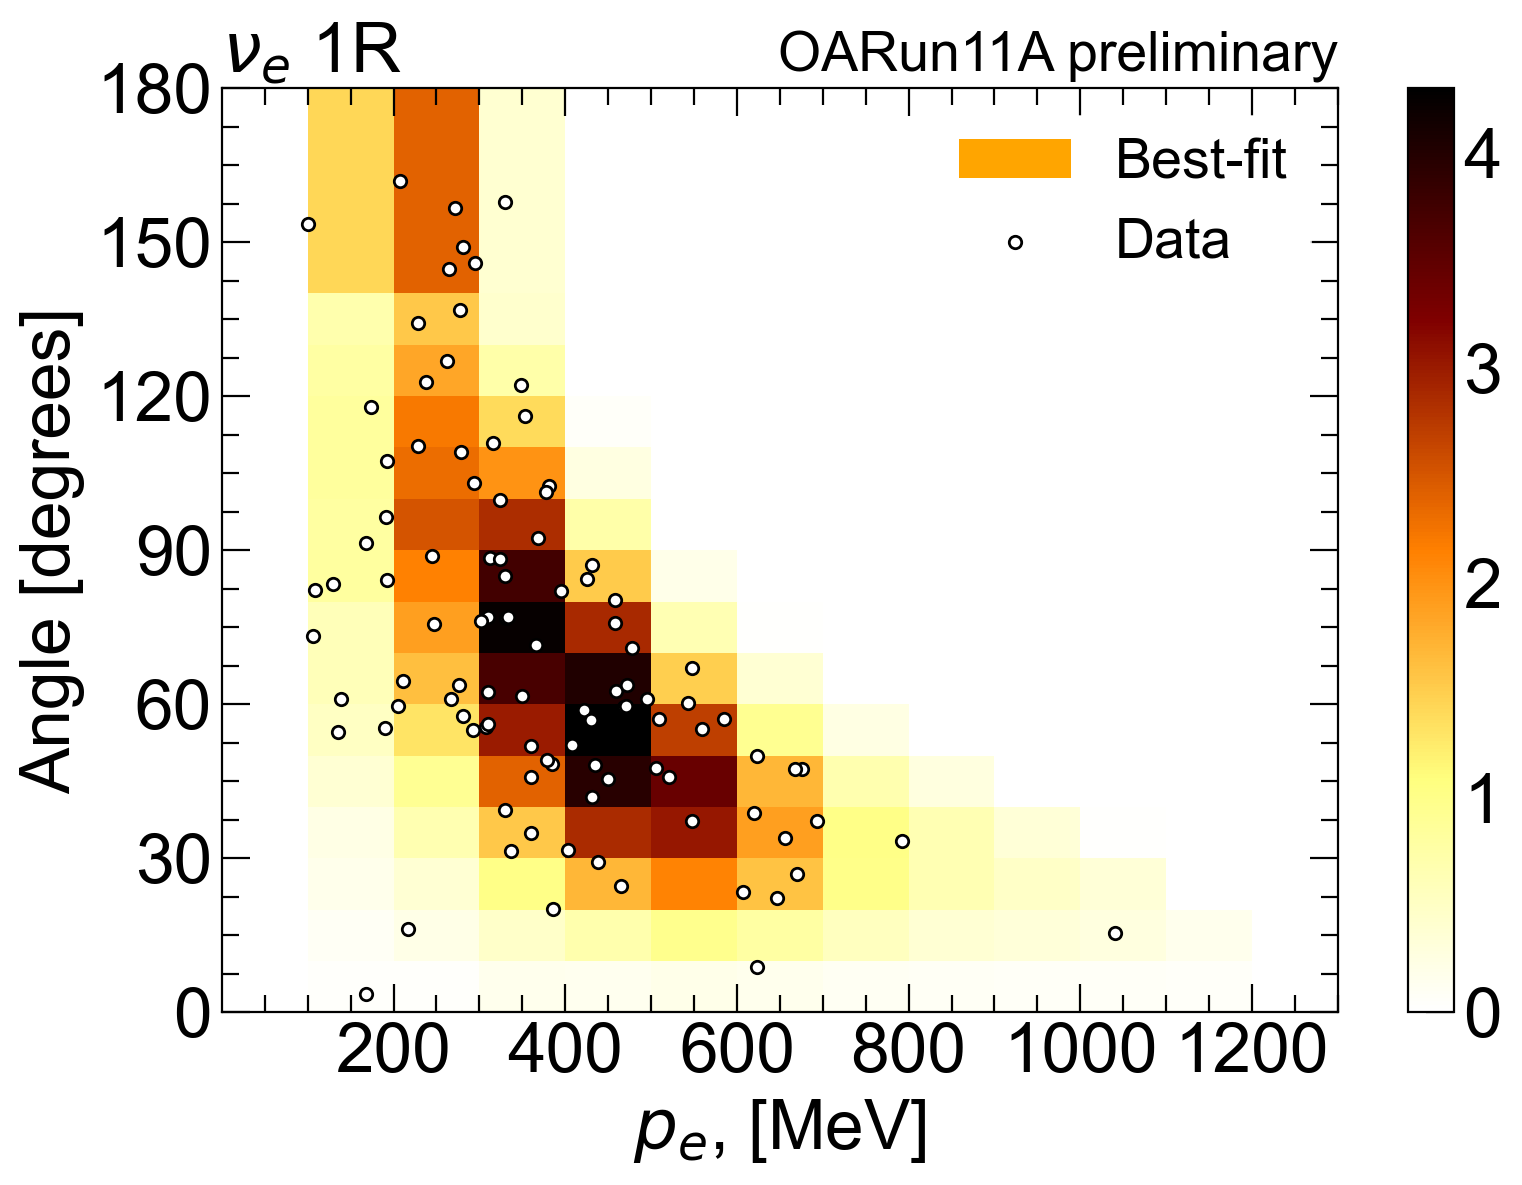

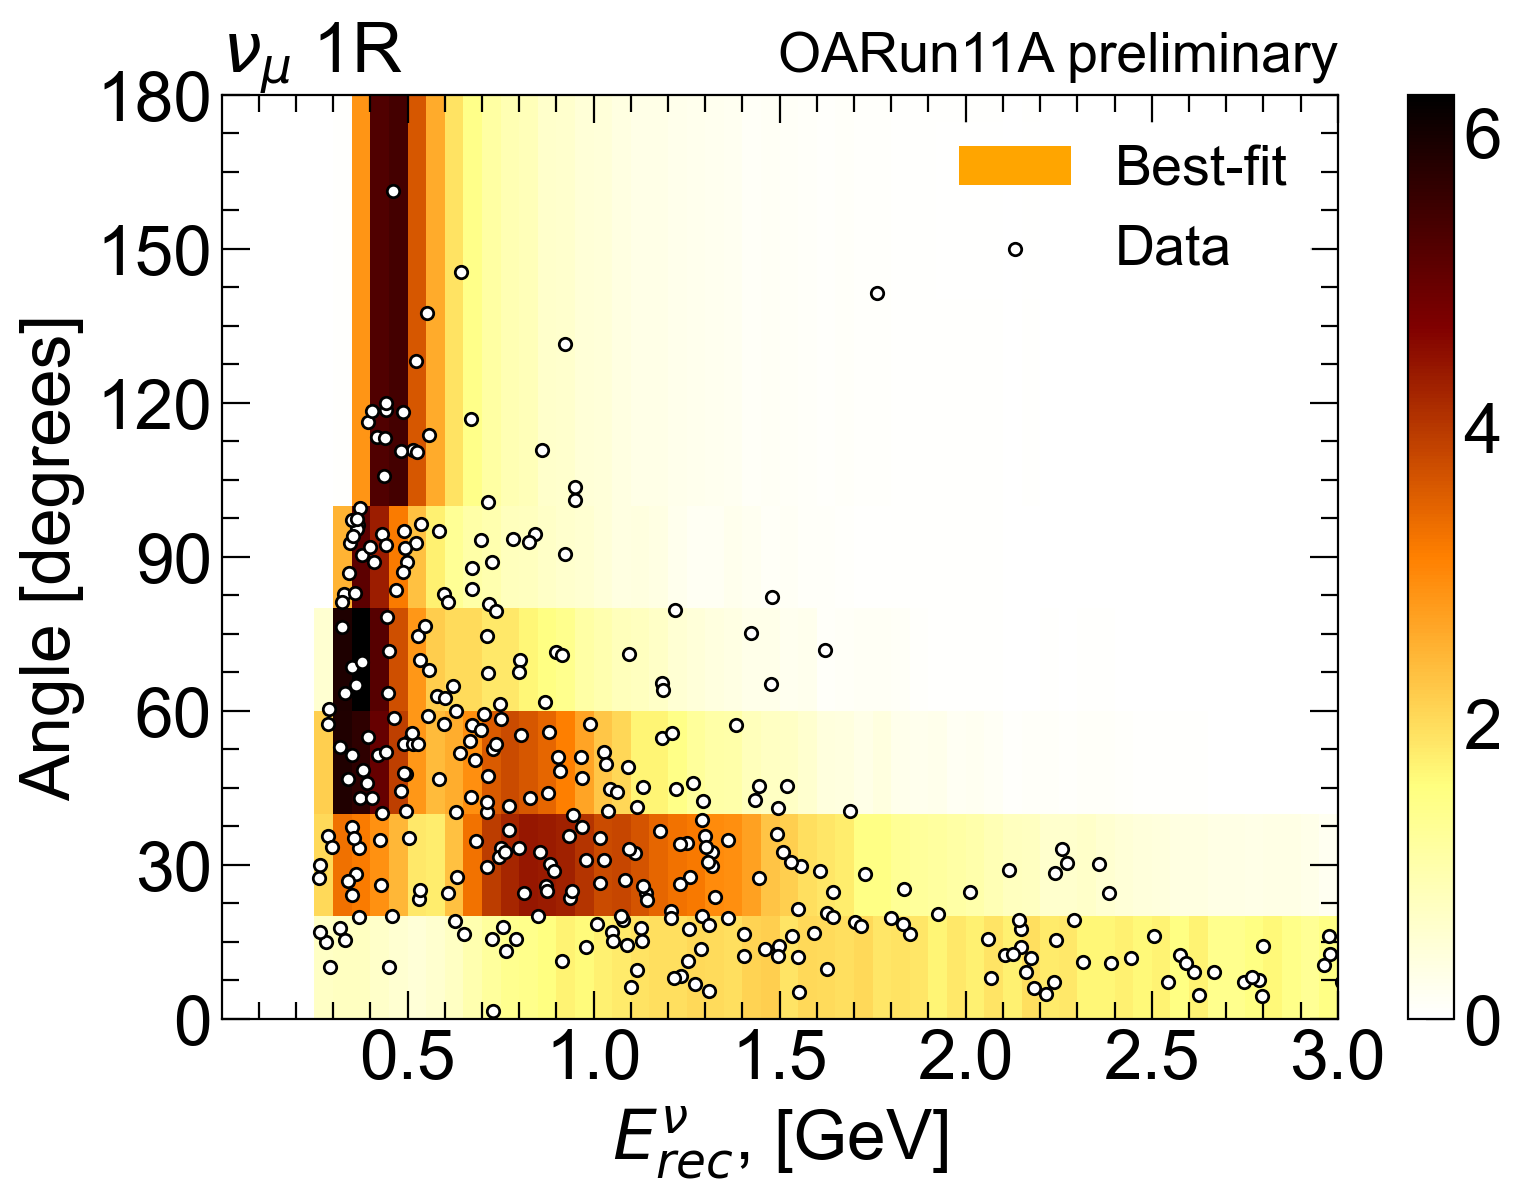

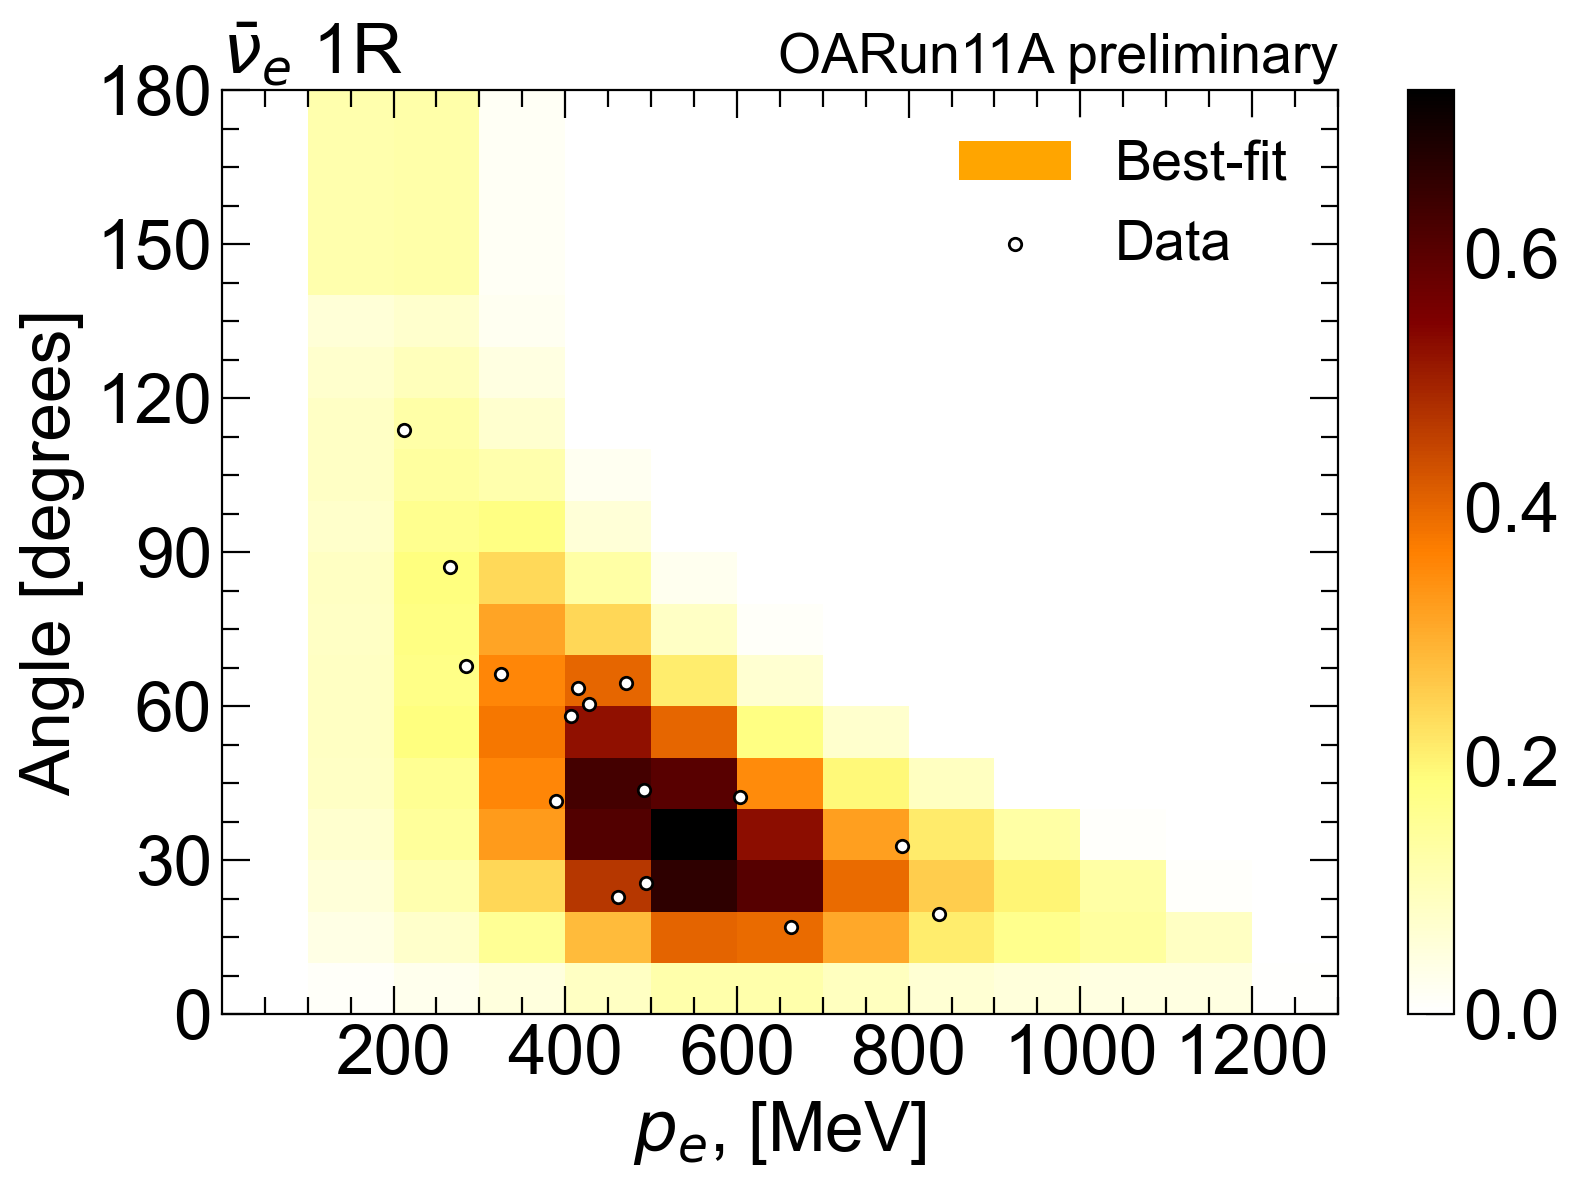

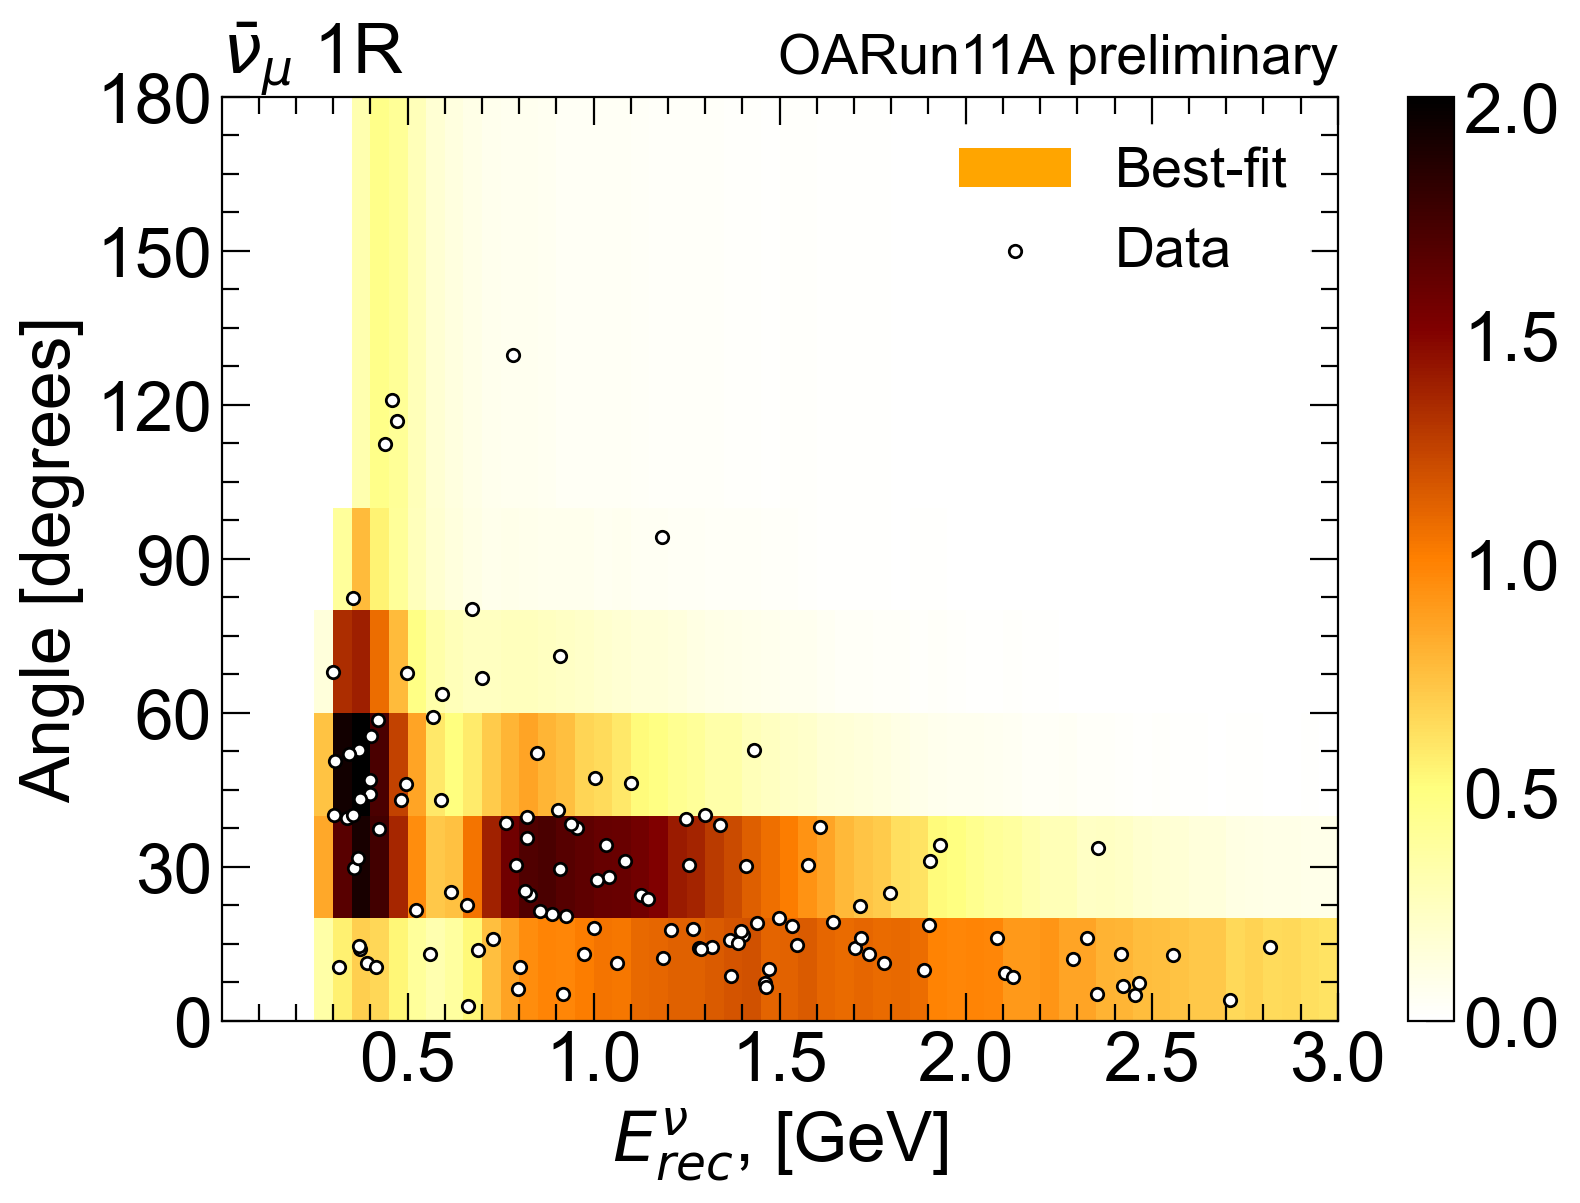

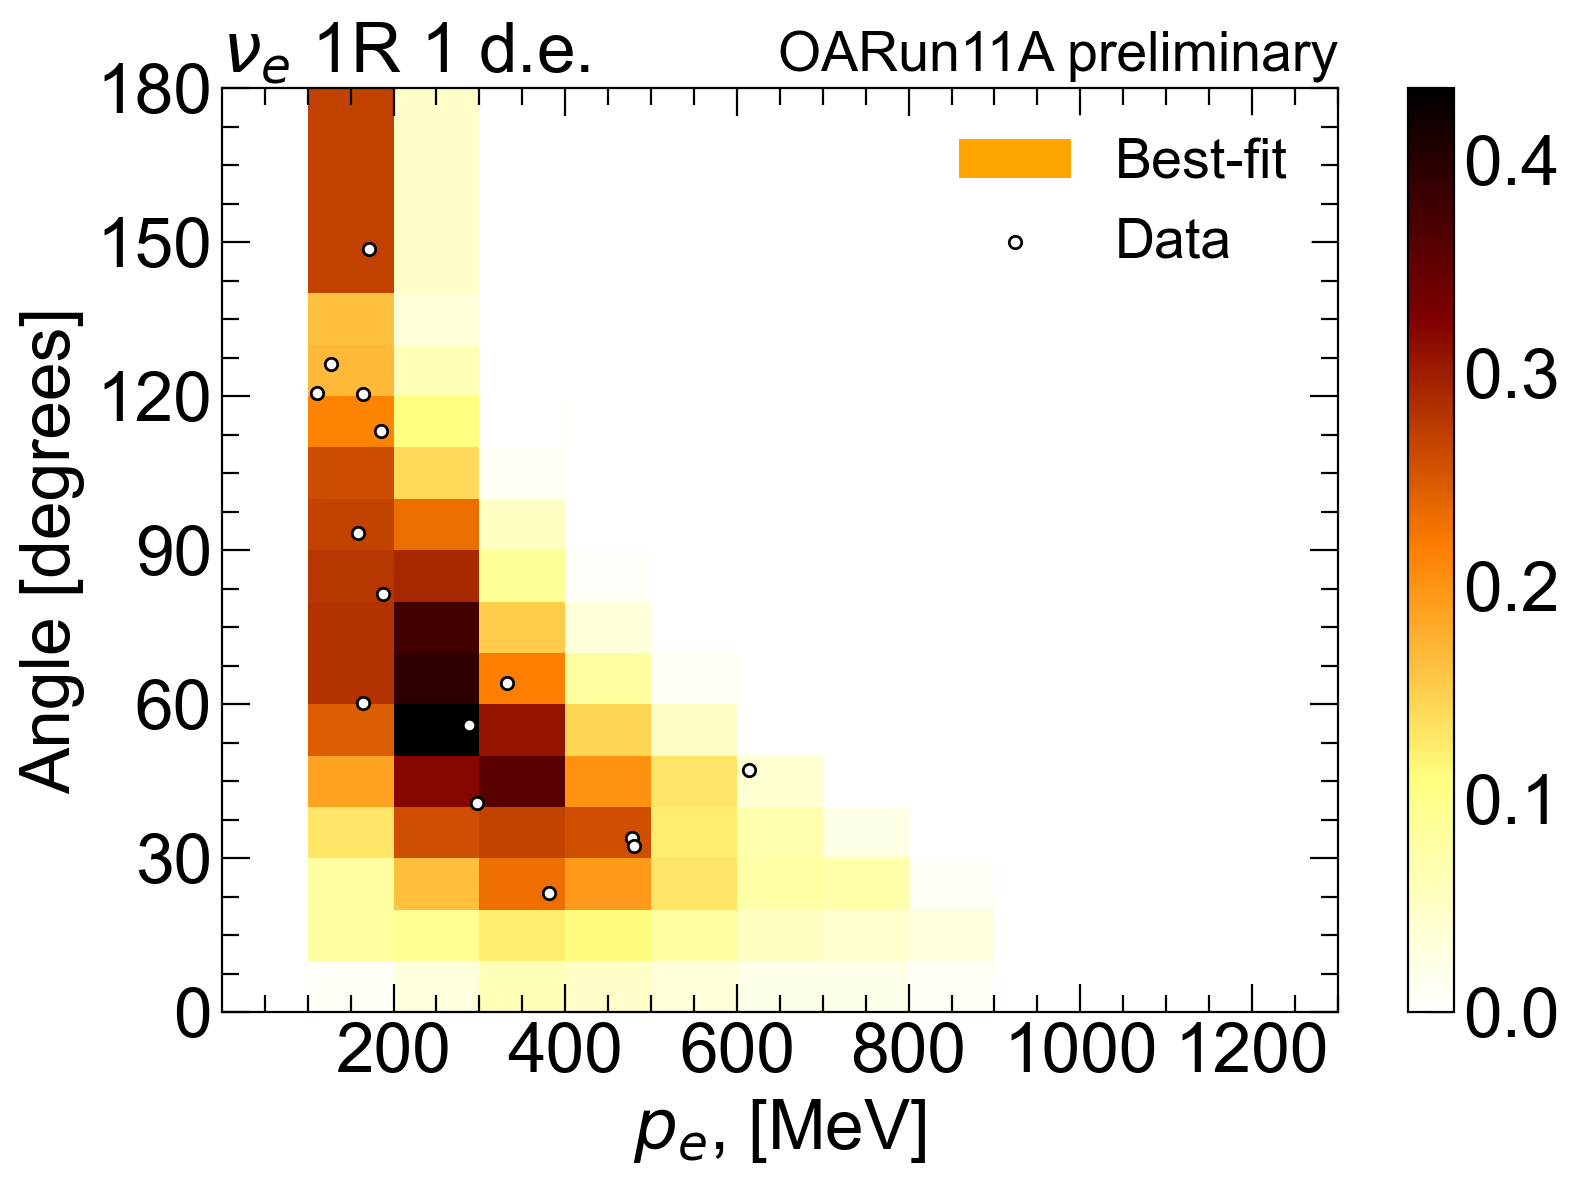

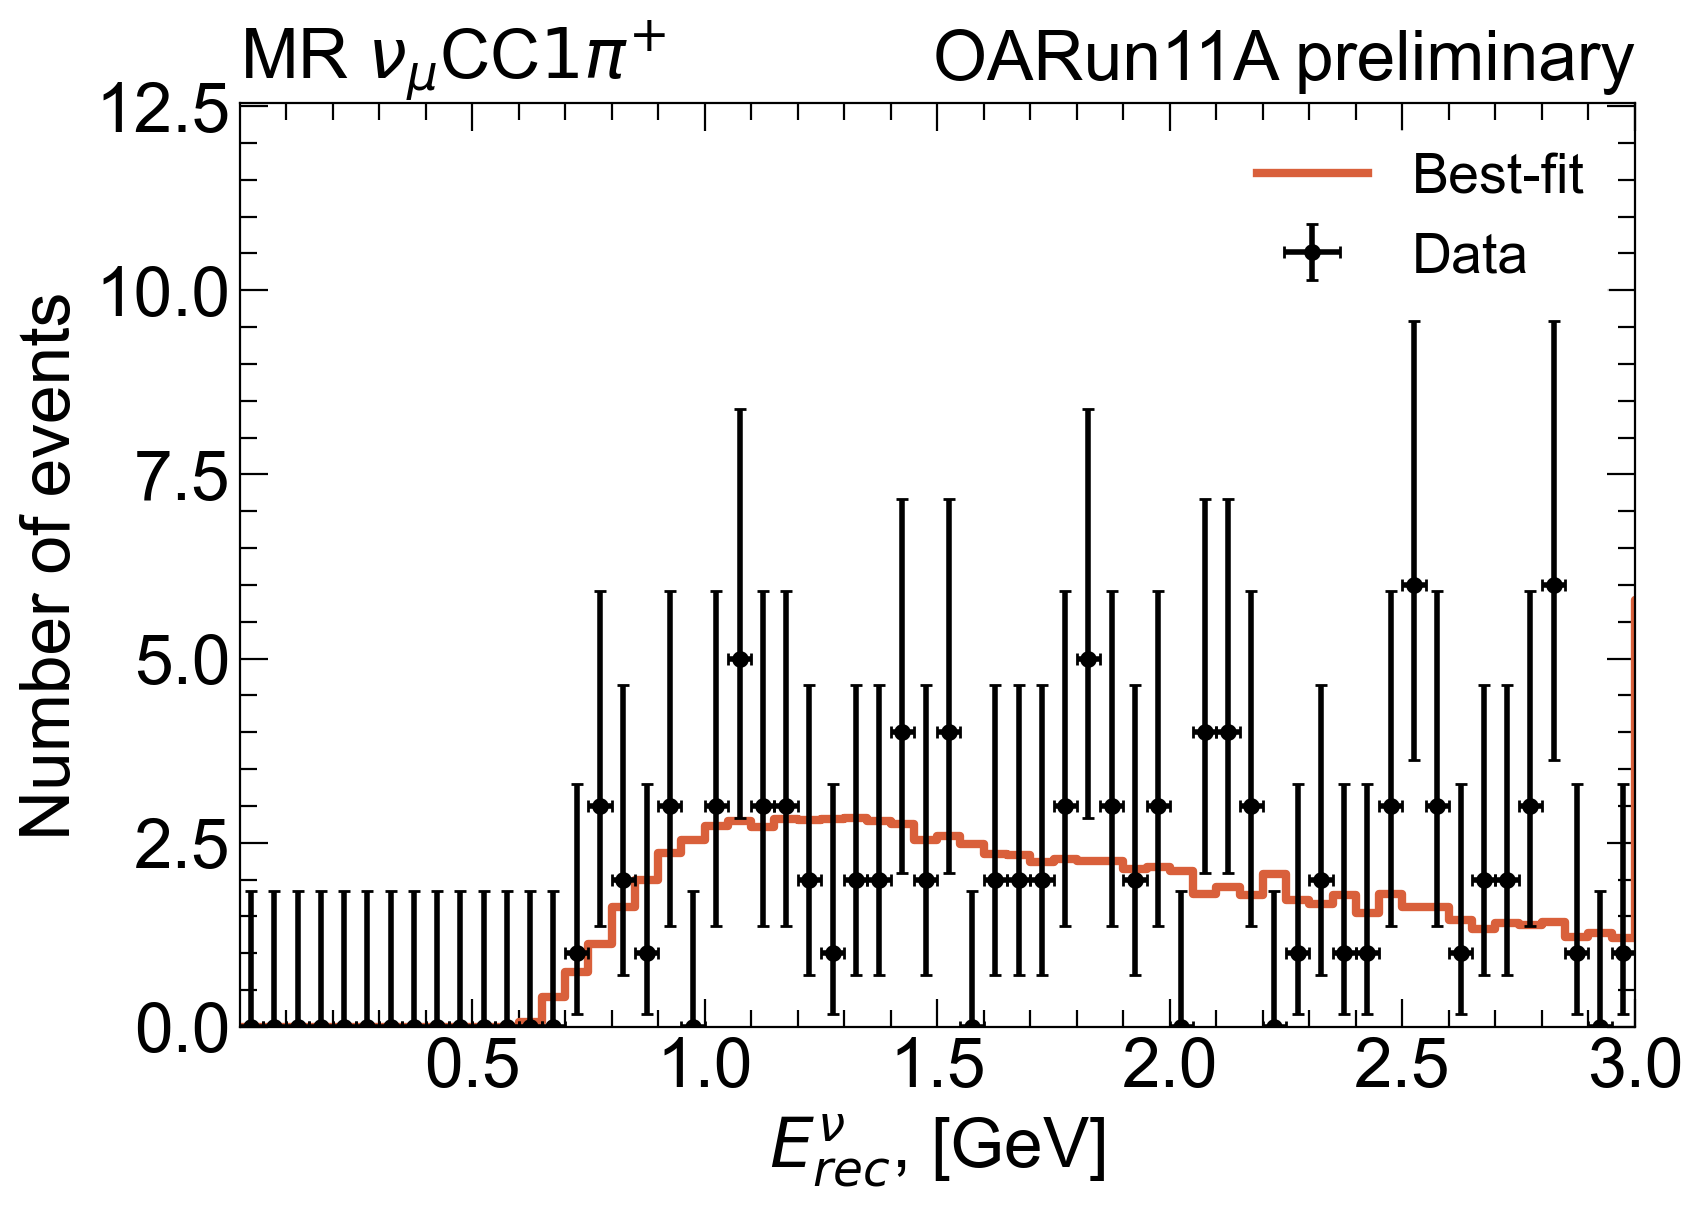

In [4]:

for sample_title in samples_dict.keys():
    fig, ax = plt.subplots()
    if sample_title == 'numucc1pi':
        asimov_bf[sample_title].plot(ax, wtag=True, label='Best-fit', color=vermilion)
        dim = '1D'
    else:
        asimov_bf[sample_title].plot(ax, wtag=True, label='Best-fit')
        dim = '2D'
    data_unbinned[sample_title].plot(ax, label='Data')
    show_minor_ticks(ax)
    ax.legend()
    fig.savefig(f"{outdir_path}/ToyXP_Bestfit_Data_{dim}_{sample_title}.pdf", bbox_inches='tight')
    fig.savefig(f"{outdir_path}/ToyXP_Bestfit_Data_{dim}_{sample_title}.png", bbox_inches='tight')
    fig.savefig(f"{outdir_path}/ToyXP_Bestfit_Data_{dim}_{sample_title}.svg", bbox_inches='tight')
    fig.savefig(f"{outdir_path}/ToyXP_Bestfit_Data_{dim}_{sample_title}.eps", format='eps', bbox_inches='tight')

# Plot 2D samples and projection to x and y

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


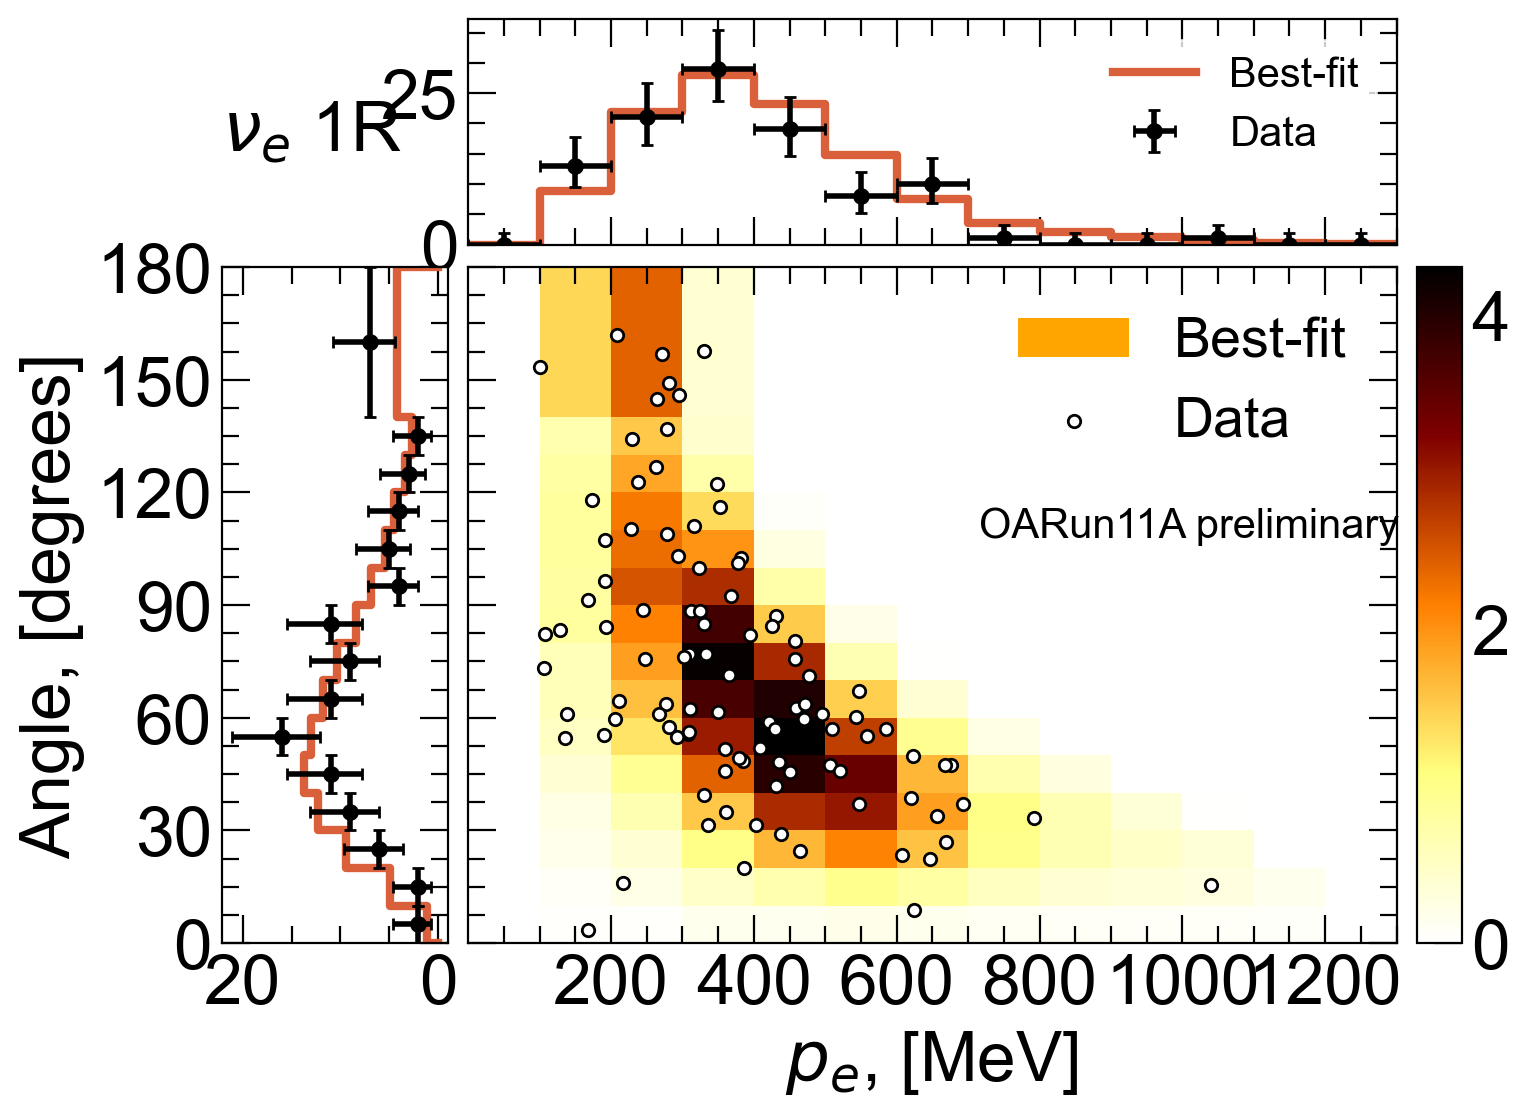

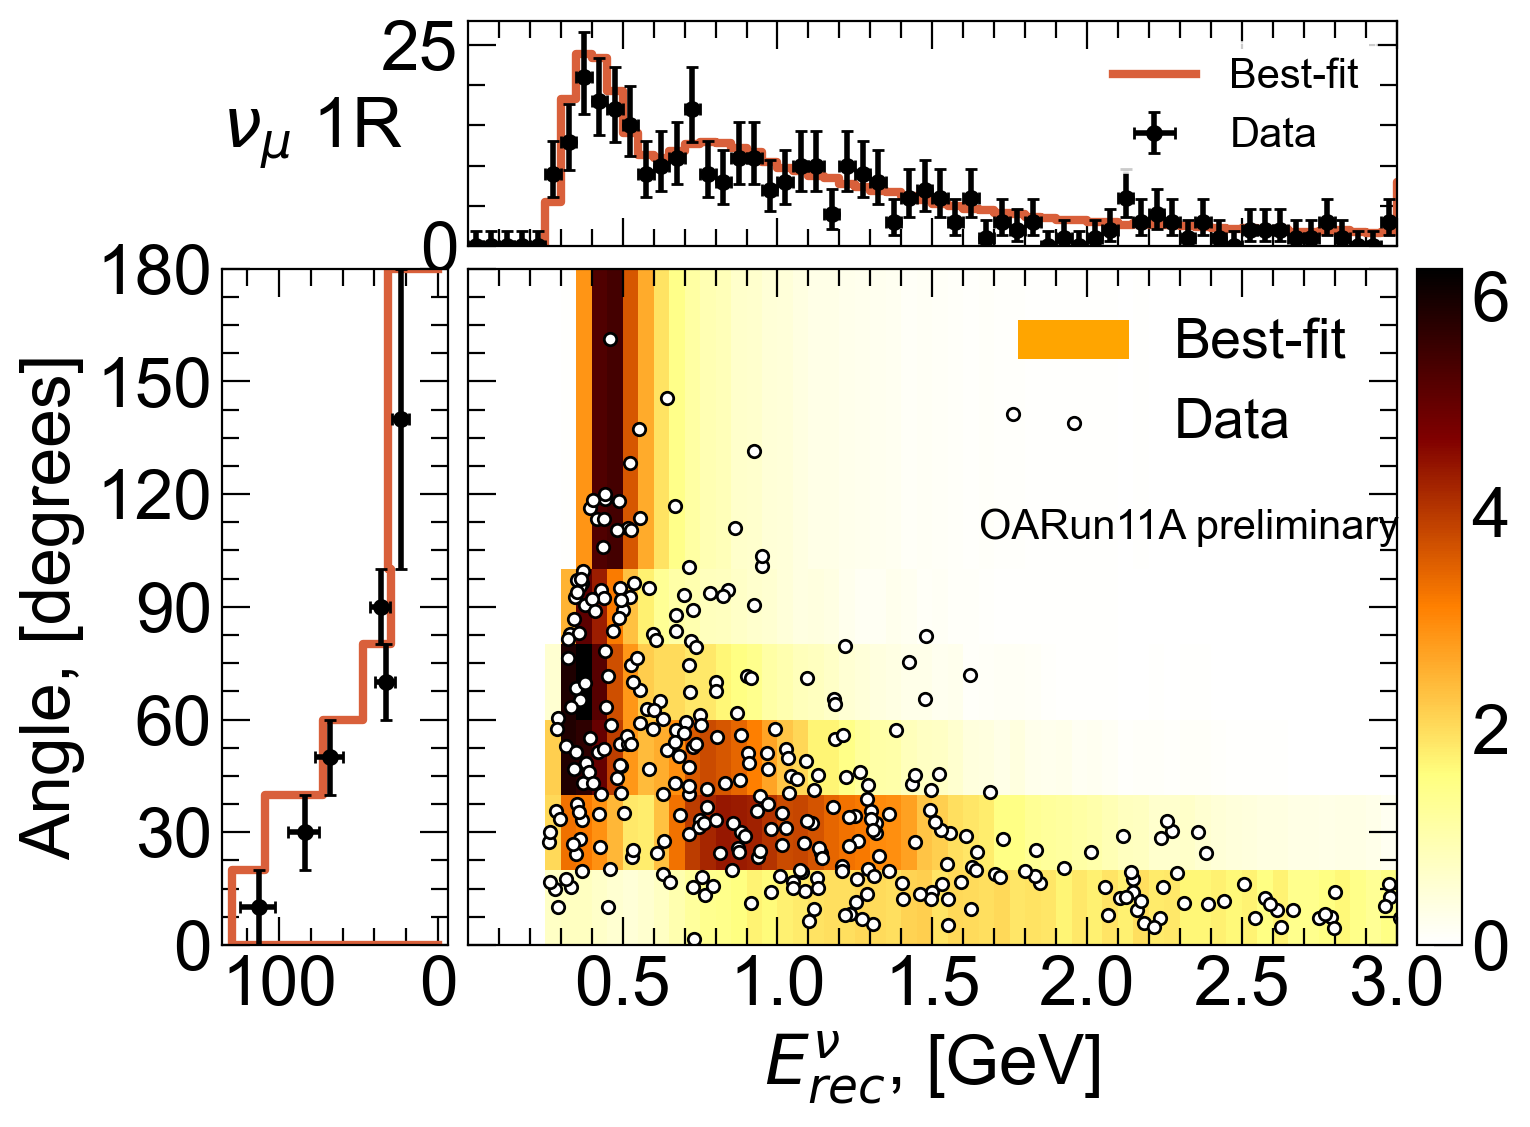

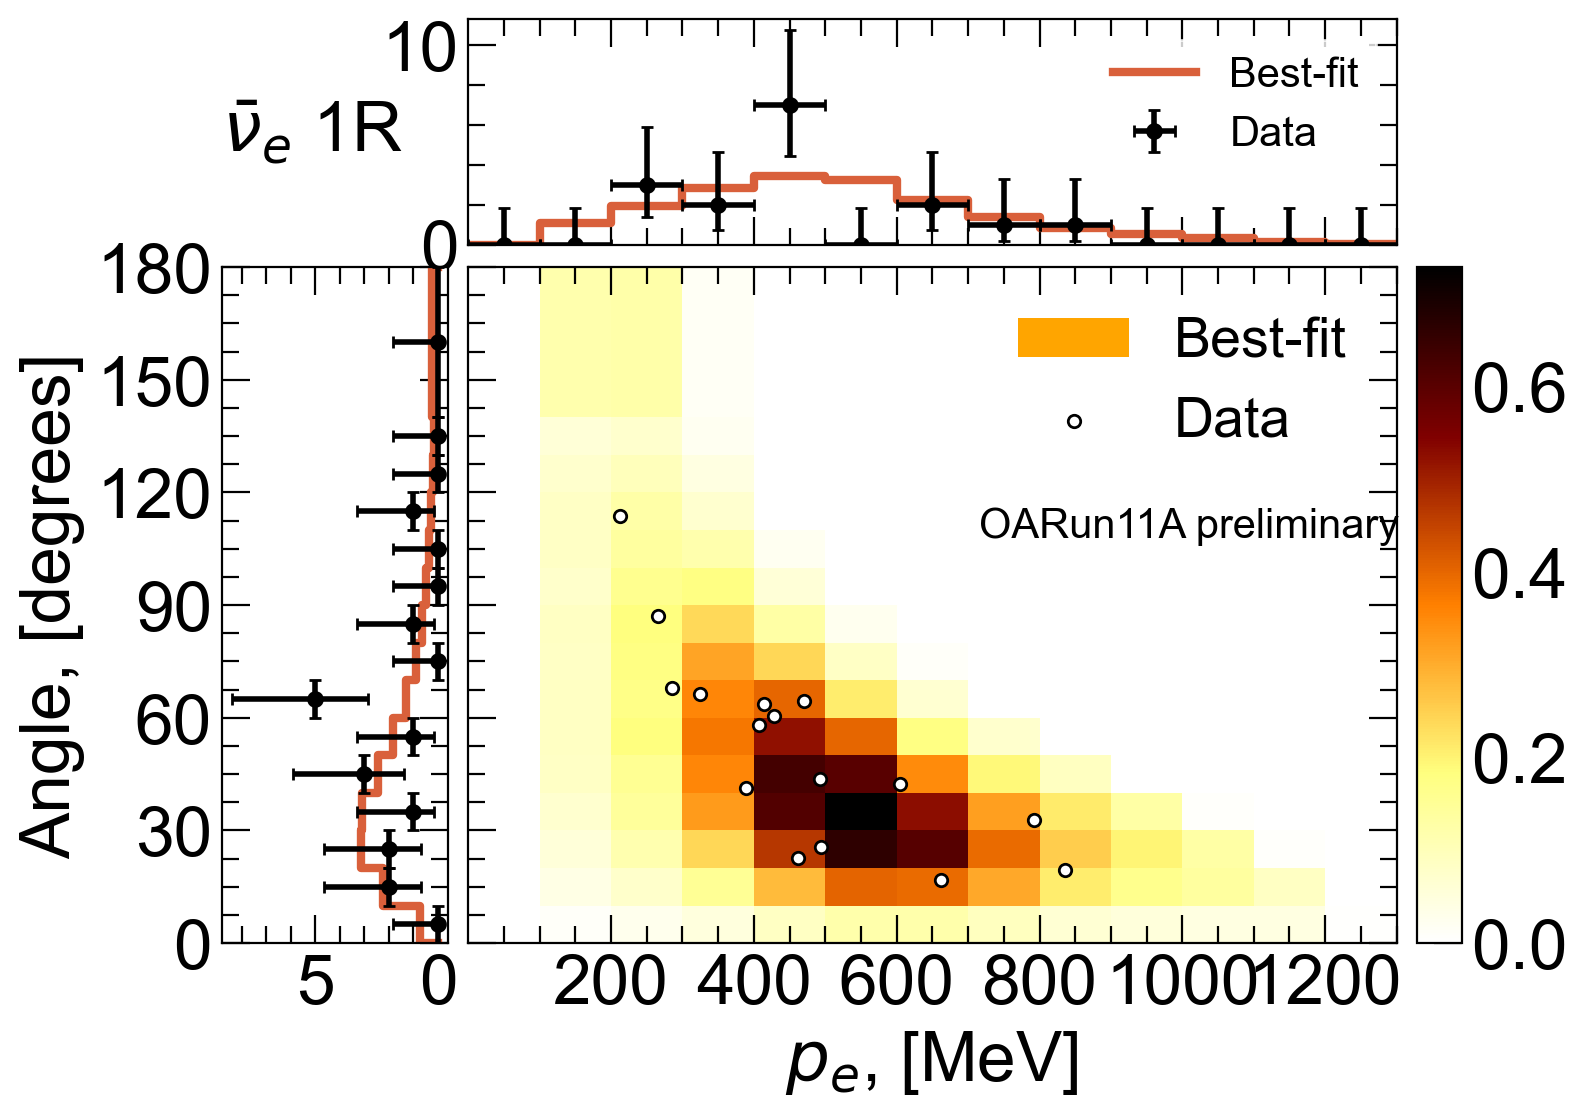

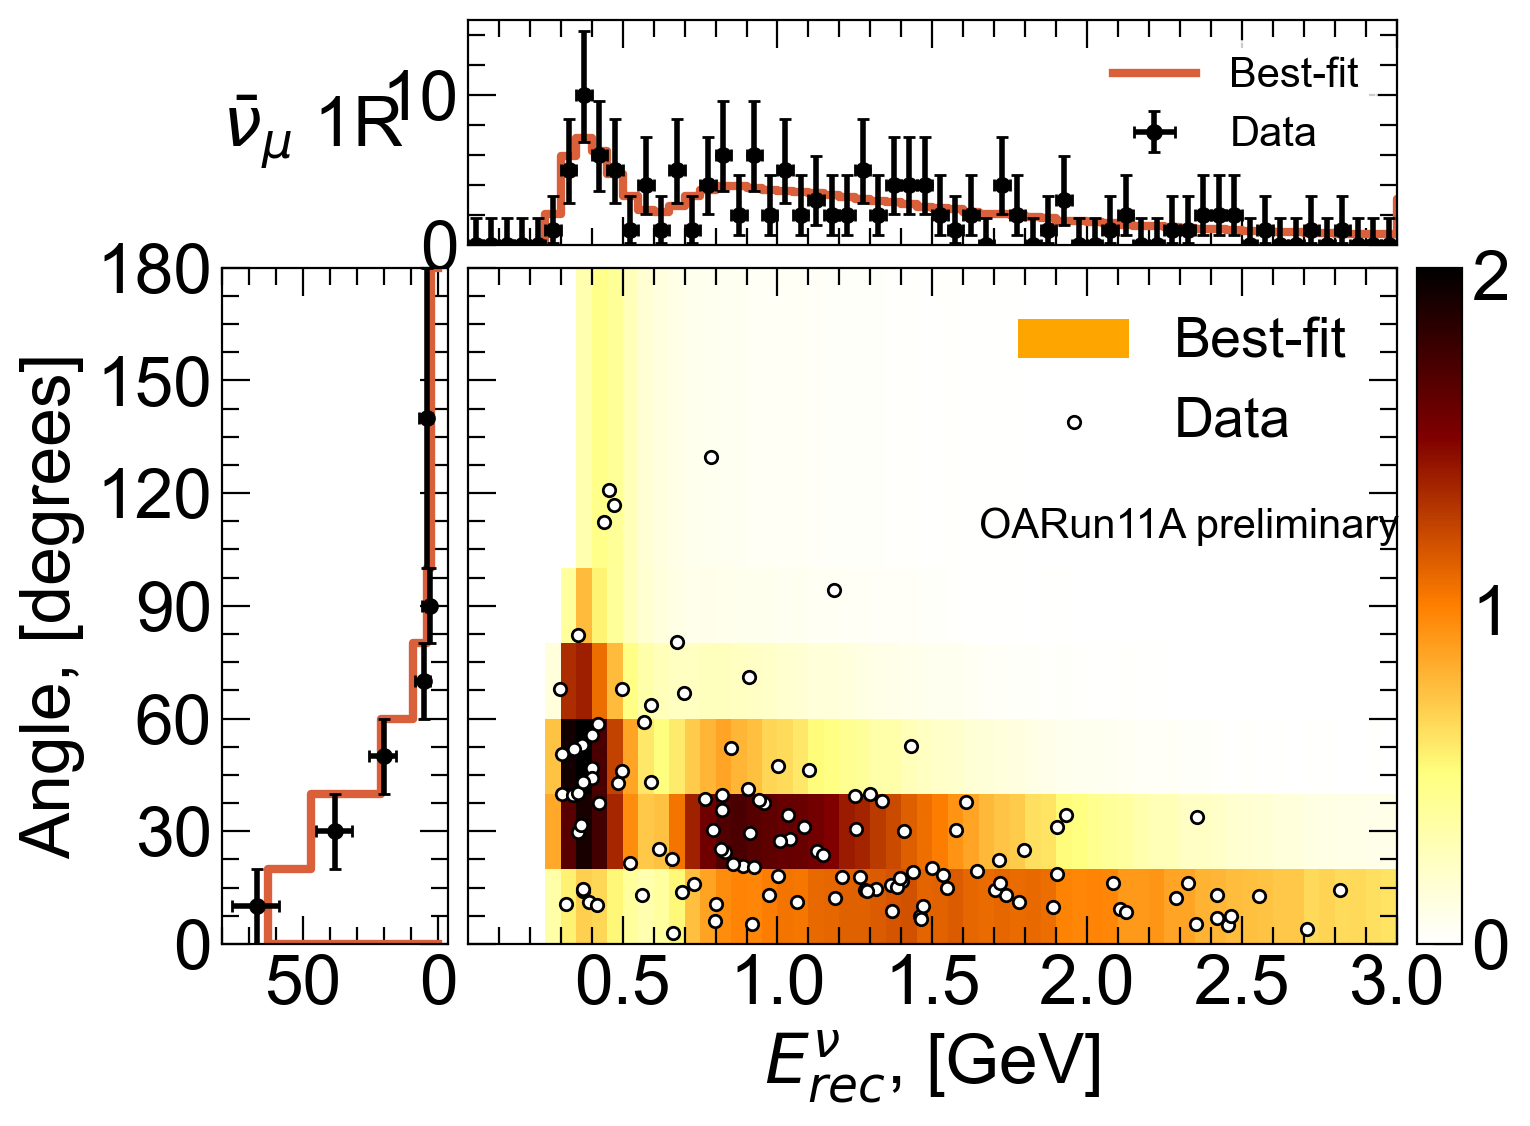

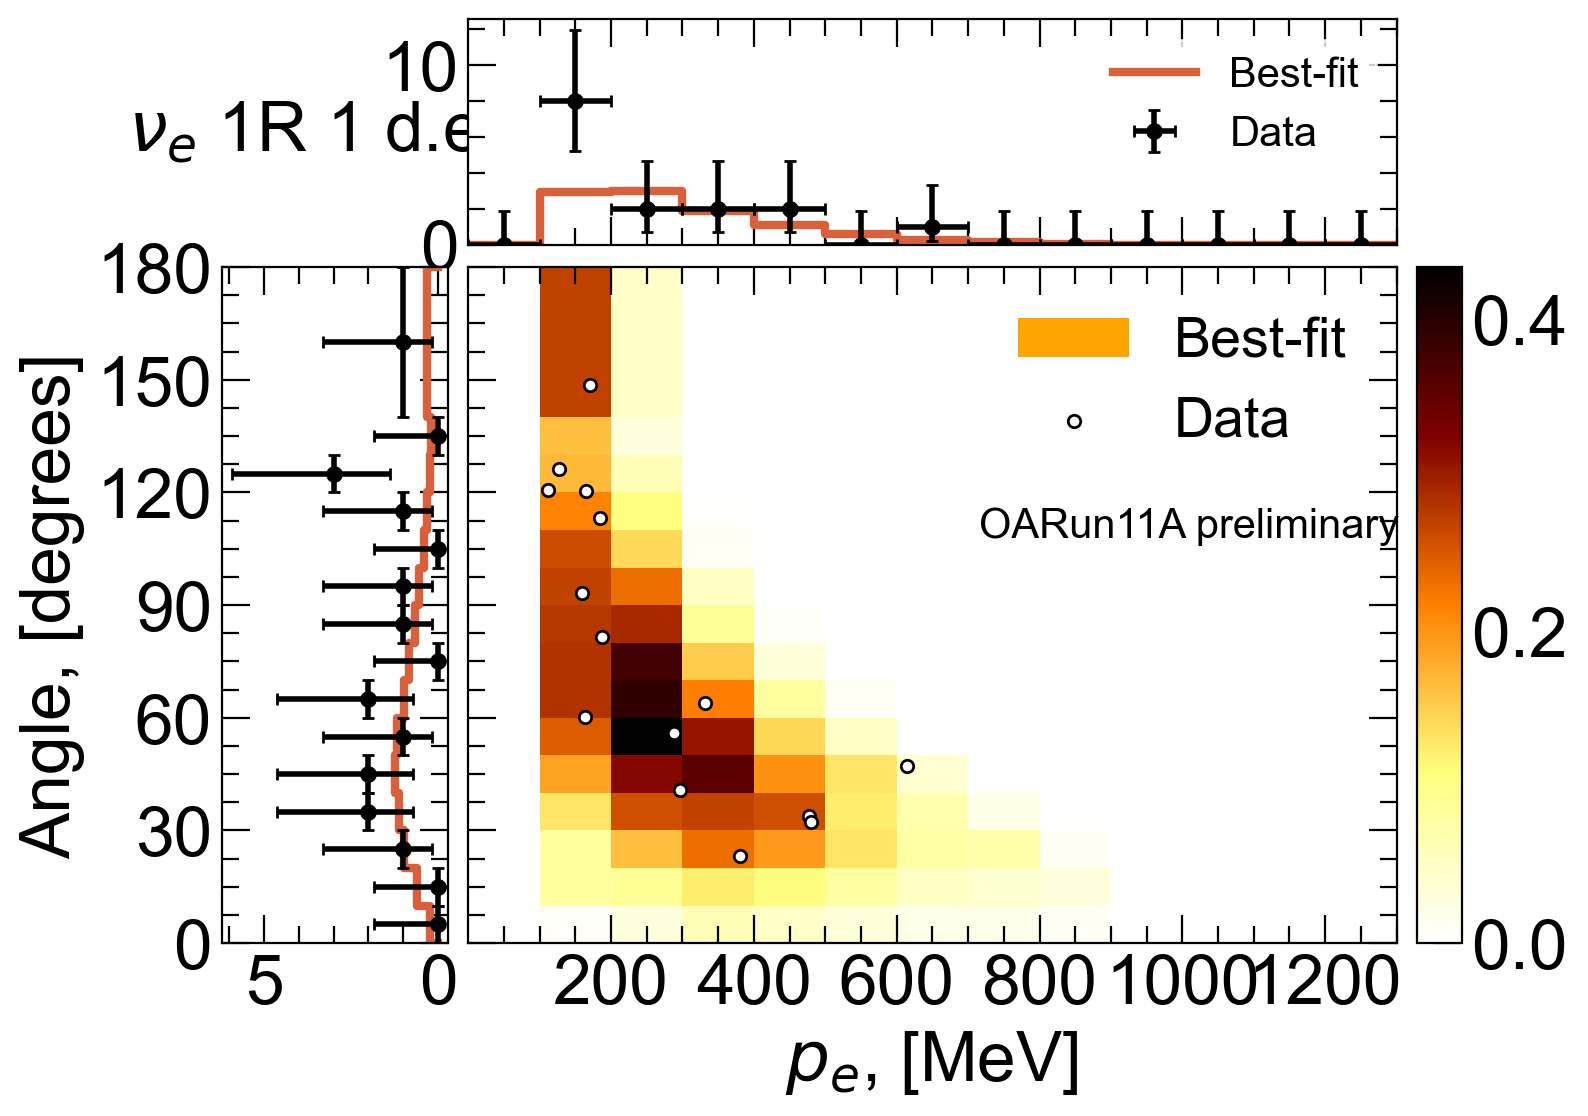

In [5]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker

def negate_labels(x, pos):
    return f"{abs(x):.0f}" 


for sample_title in samples_dict.keys():
    if sample_title == 'numucc1pi':
        continue
    fig = plt.figure(figsize=(8, 6))  # Увеличиваем ширину
    gs = gridspec.GridSpec(2, 3, width_ratios=[1, 4.1, 0.2], height_ratios=[1, 3], 
                           wspace=0.05, hspace=0.05)

    ax_corner = fig.add_subplot(gs[0, 0])  # Основной график (широкий)
    ax_main = fig.add_subplot(gs[1, 1])  # Основной график (широкий)
    ax_xproj = fig.add_subplot(gs[0, 1], sharex=ax_main)  # Верхняя проекция (узкая)
    ax_yproj = fig.add_subplot(gs[1, 0], sharey=ax_main)  # Левая проекция (узкая)
    ax_cbar = fig.add_subplot(gs[1, 2])  # Ось для цветовой шкалы

    #Main
    im = asimov_bf[sample_title].plot(ax_main, wtag=False, wtitle=False, show_colorbar=False, label='Best-fit')
    data_unbinned[sample_title].plot(ax_main, wtag=False, wtitle=False, label='Data')
    ax_main.yaxis.set_tick_params(labelleft=False)
    ax_main.set_ylabel('')
    ax_main.text(0.55, 0.6, tag, fontsize=15, transform=ax_main.transAxes)
    show_minor_ticks(ax_main)
    ax_main.legend(loc='upper right', framealpha=0)
    
    #Colorbar
    fig.colorbar(im, cax=ax_cbar, cmap=rev_afmhot)

    #Upper
    asimov_bf[sample_title].project_to_x().plot(ax_xproj, label='Best-fit', wtitle=False, color=vermilion)
    data_binned[sample_title].project_to_x().plot(ax_xproj, kind='data', label='Data', wtitle=False )
    ax_xproj.set_ylabel('')
    ax_xproj.set_xlabel('')
    ax_xproj.xaxis.set_tick_params(labelbottom=False)
    show_minor_ticks(ax_xproj)
    ax_xproj.legend(fontsize=15)

    #Left
    asimov_y_proj = asimov_bf[sample_title].project_to_y()
    data_binned_y_proj = data_binned[sample_title].project_to_y()

    plot_histogram(ax_yproj, asimov_y_proj.bin_edges[0], asimov_y_proj.z, rotate=True, color=vermilion)# we do not use built-in method because rotation is necessary
    plot_data(ax_yproj, data_binned_y_proj.bin_edges[0], data_binned_y_proj.z, rotate=True)# we do not use built-in method because rotation is necessary

    ax_yproj.set_xlabel('')
    ax_yproj.set_ylabel('Angle, [degrees]')
    ax_yproj.set_ylim(0, 180)
    ax_yproj.xaxis.set_major_formatter(ticker.FuncFormatter(negate_labels))
    show_minor_ticks(ax_yproj)

    #Text in corner
    x_center = (ax_corner.get_xlim()[0] + ax_corner.get_xlim()[1]) / 2 * 0.8
    y_center = (ax_corner.get_ylim()[0] + ax_corner.get_ylim()[1]) / 2
    ax_corner.text(x_center, y_center, sample_to_title[sample_title], ha='center', va='center', fontsize=25, color='black')
    ax_corner.set_xticks([])
    ax_corner.set_yticks([])
    ax_corner.set_frame_on(False)

    fig.savefig(f"{outdir_path}/ToyXP_Bestfit_Data_2D_with_proj_{sample_title}.pdf", bbox_inches='tight')
    fig.savefig(f"{outdir_path}/ToyXP_Bestfit_Data_2D_with_proj_{sample_title}.png", bbox_inches='tight')
    fig.savefig(f"{outdir_path}/ToyXP_Bestfit_Data_2D_with_proj_{sample_title}.svg", bbox_inches='tight')
    fig.savefig(f"{outdir_path}/ToyXP_Bestfit_Data_2D_with_proj_{sample_title}.eps", format='eps', bbox_inches='tight')
